##Loading Data set

In [71]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
file_id='12r7ONEG4kdtBQui7uoaxSFMr-BAK0lvZ'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)
df


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Univariate

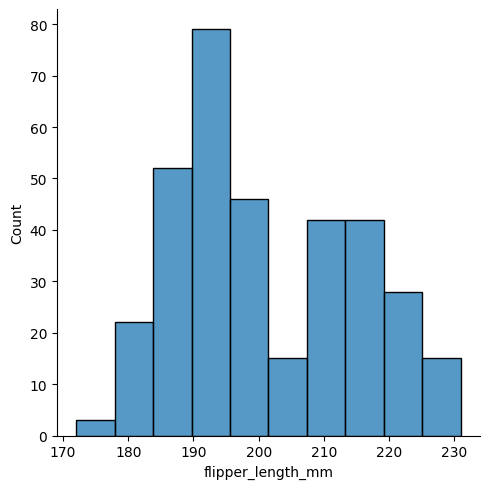

In [52]:
#barchart
import seaborn as sns
sns.displot(df['flipper_length_mm'])

Text(0.5, 1.0, 'island')

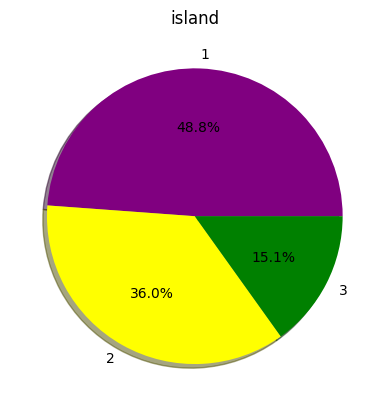

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['island'].value_counts(),labels=[1,2,3],autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow','green'])
plt.title('island')

Bivariate


<Axes: xlabel='body_mass_g', ylabel='species'>

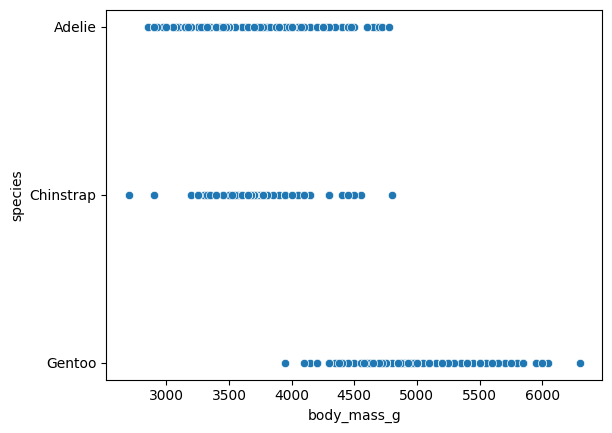

In [ ]:
sns.scatterplot(x=df['body_mass_g'],y=df['species'])

<Axes: xlabel='flipper_length_mm', ylabel='sex'>

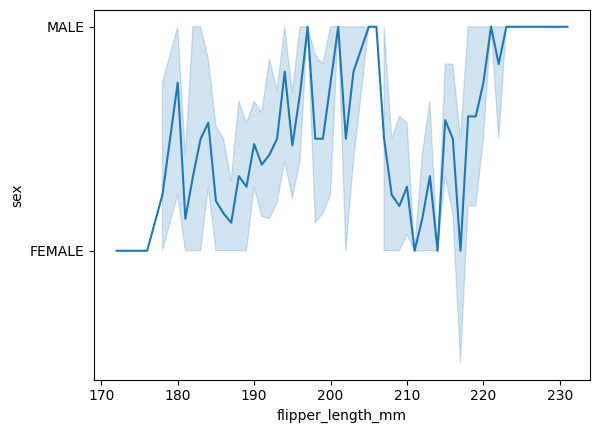

In [ ]:
##Line Plot
sns.lineplot(x=df['flipper_length_mm'],y=df.sex)

Multivariate Analysis

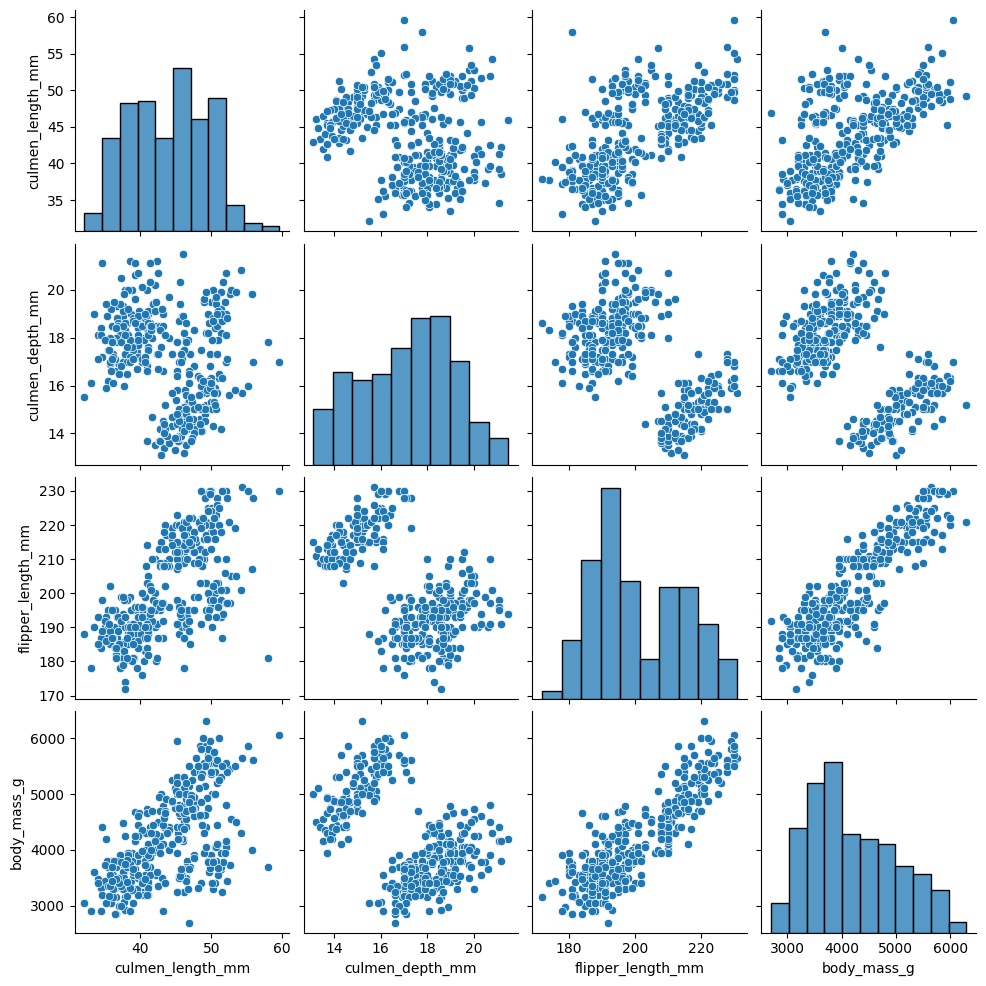

In [ ]:
sns.pairplot(df)

In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##Missing Value Handling

In [34]:
df.isnull().sum()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [72]:
df['species'].fillna(df['species'].mode(),inplace=True)
df['island'].fillna(df['island'].mode(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)
mode_sex=df.sex.mode()
df['sex'].fillna(mode_sex[0],inplace=True)

In [73]:
df.isnull().any()
df.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

##Outlier handling

<Axes: >

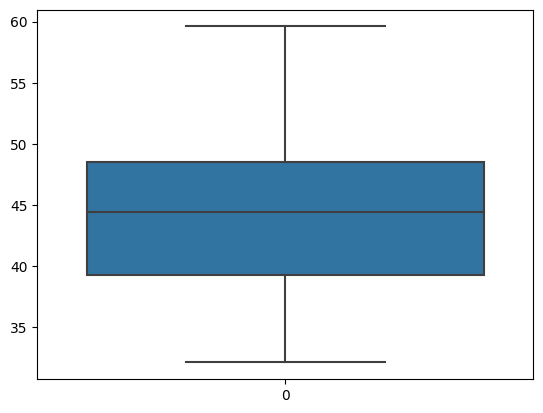

In [53]:
sns.boxplot(df['culmen_length_mm'])

<Axes: >

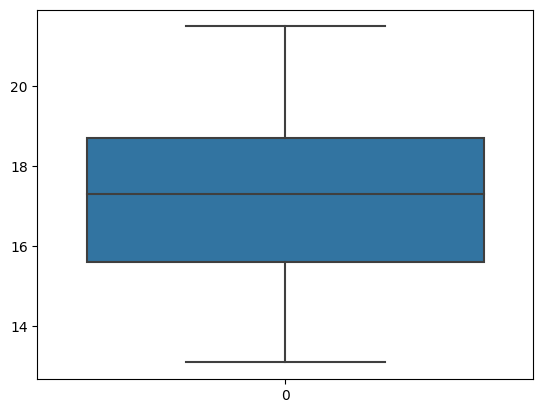

In [55]:
sns.boxplot(df['culmen_depth_mm'])

<Axes: >

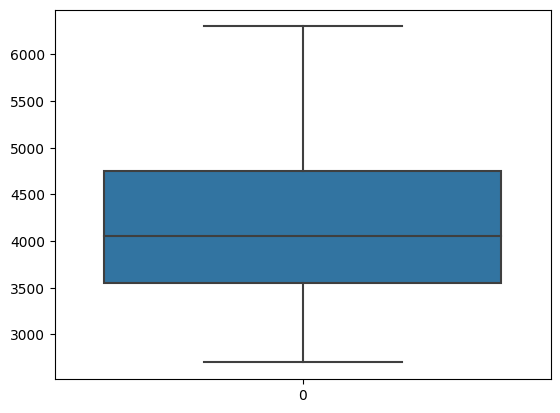

In [58]:
sns.boxplot(df['body_mass_g'])

<Axes: >

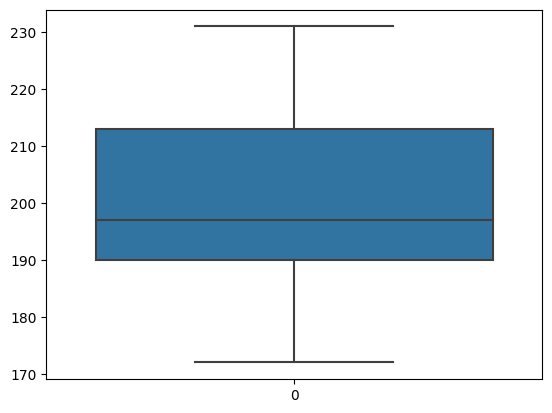

In [59]:
sns.boxplot(df['flipper_length_mm'])

##Correlation

<ipython-input-5-084798591dac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

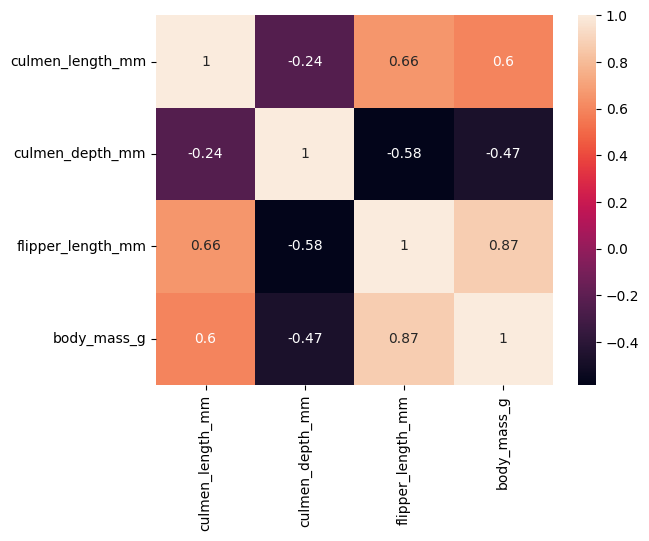

In [5]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

##Label Encoding

In [85]:

le = LabelEncoder()
df.sex = le.fit_transform(df.sex)
df.island=le.fit_transform(df.island)

In [86]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10,18.7,181.0,3750.0,2
1,Adelie,2,39.50,17.4,186.0,3800.0,1
2,Adelie,2,40.30,18.0,195.0,3250.0,1
3,Adelie,2,44.45,17.3,197.0,4050.0,2
4,Adelie,2,36.70,19.3,193.0,3450.0,1


##Spllitting


In [89]:
y=df['species']
X=df.drop(columns=['species'],axis=1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,1
2,2,40.30,18.0,195.0,3250.0,1
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,1


##Scaling the independent variable

In [90]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [93]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


##Testing and testing data split

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=10)

##Shape of test and training data

In [98]:
print("For x,shape of test:\t{}\nshape of training data:\t{}".format(X_train.shape,X_test.shape))
print("For y,shape of test:\t{}\nshape of training data:\t{}".format(y_train.shape,y_test.shape))

For x,shape of test:	(240, 6)
shape of training data:	(104, 6)
For y,shape of test:	(240,)
shape of training data:	(104,)
